import depencies

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

read data

In [2]:
data = pd.read_csv("images_labels.csv")
data.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,1.jpg,960,960,1,677,373,761,401
1,10.jpg,960,960,1,500,468,553,537
2,100.jpg,661,661,1,403,417,479,474
3,100.jpg,661,661,1,441,499,548,563
4,100.jpg,661,661,1,6,563,85,593


In [3]:
data.shape

(570, 8)

In [4]:
selected_data = pd.read_csv("images/data.csv")
selected_data.head()

,traingroup,filepath,object_class,xmin,ymin,TRX,TRY,xmax,ymax,BLX,BLY
0,TRAINING,1.jpg,1,0.705208,0.388542,NaN,NaN,0.792708,0.417708,NaN,NaN
1,VALIDATION,10.jpg,1,0.520833,0.487500,NaN,NaN,0.576042,0.559375,NaN,NaN
2,TRAINING,100.jpg,1,0.609682,0.630862,NaN,NaN,0.724660,0.717095,NaN,NaN
3,TRAINING,100.jpg,1,0.667171,0.754917,NaN,NaN,0.829047,0.851740,NaN,NaN
4,TRAINING,100.jpg,1,0.009077,0.851740,NaN,NaN,0.128593,0.897126,NaN,NaN


In [5]:
selected_data.shape

(472, 11)

In [6]:
data = data[data['class'] != 3]
data.shape

(472, 8)

Make the tflite dataloader sheet for mirrored images for data augmentation

In [7]:
mirror_data = selected_data.copy()
mirror_data['filepath'] = mirror_data['filepath'].str.replace('.jpg', 'mirror.jpg')
mirror_data['xmin'] = 1 - selected_data['xmax'].copy()
mirror_data['xmax'] = 1 - selected_data['xmin'].copy()
mirror_data.head()

<ipython-input-7-f72756df67f4>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  mirror_data['filepath'] = mirror_data['filepath'].str.replace('.jpg', 'mirror.jpg')


,traingroup,filepath,object_class,xmin,ymin,TRX,TRY,xmax,ymax,BLX,BLY
0,TRAINING,1mirror.jpg,1,0.207292,0.388542,NaN,NaN,0.294792,0.417708,NaN,NaN
1,VALIDATION,10mirror.jpg,1,0.423958,0.487500,NaN,NaN,0.479167,0.559375,NaN,NaN
2,TRAINING,100mirror.jpg,1,0.275340,0.630862,NaN,NaN,0.390318,0.717095,NaN,NaN
3,TRAINING,100mirror.jpg,1,0.170953,0.754917,NaN,NaN,0.332829,0.851740,NaN,NaN
4,TRAINING,100mirror.jpg,1,0.871407,0.851740,NaN,NaN,0.990923,0.897126,NaN,NaN


Test annotation in mirror_data

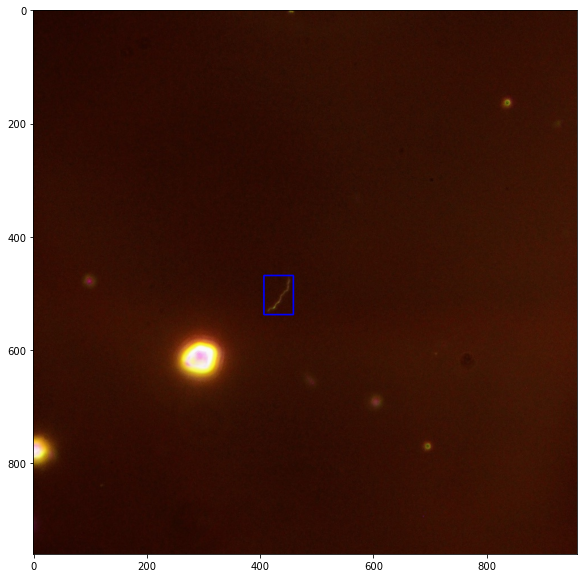

In [8]:
startpoint = (int(mirror_data['xmin'][1]*960), int(mirror_data['ymin'][1]*960))
endpoint = (int(mirror_data['xmax'][1]*960), int(mirror_data['ymax'][1]*960))
image = cv2.imread('images/' + mirror_data['filepath'][1])
image = cv2.rectangle(image, startpoint, endpoint, (255, 0, 0), 2)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

Make the tflite dataloader sheet for clockwise rotated images for data augmentation

In [9]:
import math
def rotate_point(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.
    :param angle: <float> Angle in radians.
        Positive angle is counterclockwise.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [10]:
clock_data = selected_data.copy()
clock_data['filepath'] = clock_data['filepath'].str.replace('.jpg', 'clock.jpg')
centerpoint = (0.5,0.5)
angle = math.radians(90)
resultp1 = [rotate_point(centerpoint, (x, y), angle) for x, y in zip(clock_data['xmin'], clock_data['ymin'])]
resultp2 = [rotate_point(centerpoint, (x, y), angle) for x, y in zip(clock_data['xmax'], clock_data['ymax'])]
clock_data['xmax']=[i[0] for i in resultp1]
clock_data['ymin']=[i[1] for i in resultp1]
clock_data['xmin']=[i[0] for i in resultp2]
clock_data['ymax']=[i[1] for i in resultp2]
clock_data.head()

<ipython-input-10-9ff133691643>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  clock_data['filepath'] = clock_data['filepath'].str.replace('.jpg', 'clock.jpg')


,traingroup,filepath,object_class,xmin,ymin,TRX,TRY,xmax,ymax,BLX,BLY
0,TRAINING,1clock.jpg,1,0.582292,0.705208,NaN,NaN,0.611458,0.792708,NaN,NaN
1,VALIDATION,10clock.jpg,1,0.440625,0.520833,NaN,NaN,0.512500,0.576042,NaN,NaN
2,TRAINING,100clock.jpg,1,0.282905,0.609682,NaN,NaN,0.369138,0.724660,NaN,NaN
3,TRAINING,100clock.jpg,1,0.148260,0.667171,NaN,NaN,0.245083,0.829047,NaN,NaN
4,TRAINING,100clock.jpg,1,0.102874,0.009077,NaN,NaN,0.148260,0.128593,NaN,NaN


Test image annotation

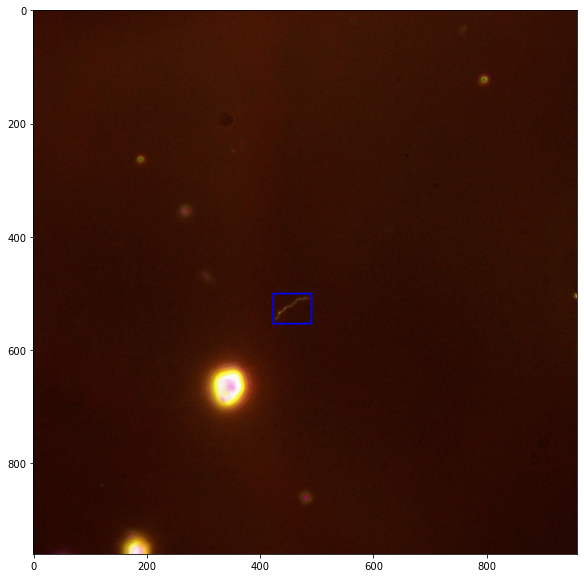

In [11]:
startpoint = (int(clock_data['xmin'][1]*960), int(clock_data['ymin'][1]*960))
endpoint = (int(clock_data['xmax'][1]*960), int(clock_data['ymax'][1]*960))
image = cv2.imread('images/10clock.jpg')
image = cv2.rectangle(image, startpoint, endpoint, (255, 0, 0), 2)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

Write augmented dataloader csv

In [17]:
df = pd.concat([selected_data,clock_data], ignore_index='true')

In [18]:
df2 = df.drop_duplicates(subset = ['filepath'])
np.random.seed(3)
wookie = np.random.randint(1, 10000, size=len(df2['filepath']))/10000
groups = np.where(wookie <= 0.2, (np.where(wookie <= 0.1, 'VALIDATION', 'TESTING')),'TRAINING')

In [19]:
traingroup = []

for file in df['filepath']:
    traingroup.append(groups[df2['filepath'] == file][0])
    
len(traingroup)

944

In [20]:
df['traingroup'] = traingroup

In [21]:
df.to_csv('images/data_aug.csv', index=None)